# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf

from seaborn import load_dataset


tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [100]:

y, X = dmatrices('tip ~ sex + smoker + time + total_bill', data=tips, return_type='dataframe')

# Ajustar o modelo inicial
modelo_inicial = sm.OLS(y, X).fit()
display(modelo_inicial.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.78
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.65e-31
Time:                        22:41:25   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             709.8
Df Residuals:                     239   BIC:                             727.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7961      0.224      3.561      0.000       0.356       1.237
sex[T.Female]      0.0290      0.141      0.206      0.837      -0.249       0.307
smoker[T.No]       0.1494      0.136      1.100      0.273      -0.118       0.417
time[T.Dinner]     0.0056      0.152      0.037      0.971      -0.293       0.304
total_bill         0.1059      0.008     13.954      0.000       0.091       0.121
==============================================================================
Omnibus:                       23.967   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.821
Skew:                           0.528   Prob(JB):                     1.85e-10
Kurtosis:                       4.815   Cond. No.                         83.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Ajustar o modelo sem as variáveis não significantes
y, X = dmatrices('tip ~ total_bill', data=tips, return_type='dataframe')


modelo_atualizado = sm.OLS(y, X).fit()

display(modelo_atualizado.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.69e-34
Time:                        22:41:25   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

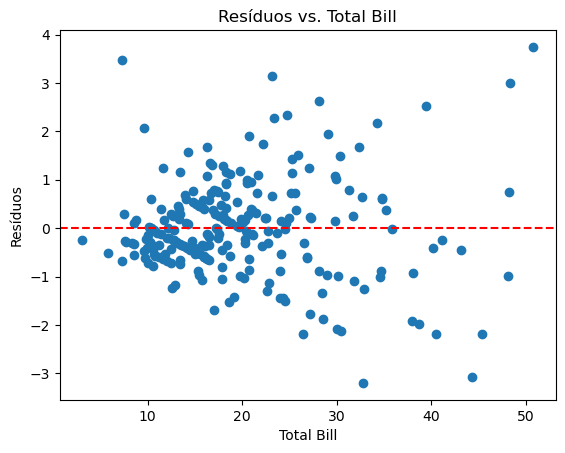

In [102]:
plt.scatter(tips['total_bill'], modelo_atualizado.resid)
plt.xlabel('Total Bill')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Total Bill')
plt.axhline(y=0,color='r',linestyle='--')
plt.show()


In [103]:
tips['log_total_bill'] = np.log(tips['total_bill'])

y, X_log = dmatrices('tip ~ log_total_bill', data=tips, return_type='dataframe')

modelo_log = sm.OLS(y, X_log).fit()
display(modelo_log.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     181.2
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           3.30e-31
Time:                        22:41:25   Log-Likelihood:                -356.76
No. Observations:                 244   AIC:                             717.5
Df Residuals:                     242   BIC:                             724.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9645      0.448     -6.617      0.000      -3.847      -2.082
log_total_bill     2.0630      0.153     13.462      0.000       1.761       2.365
==============================================================================
Omnibus:                       51.858   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.339
Skew:                           0.936   Prob(JB):                     5.53e-31
Kurtosis:                       6.194   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
tips['total_bill_sq'] = tips['total_bill'] ** 2

y, X_poly = dmatrices('tip ~ total_bill + total_bill_sq', data=tips, return_type='dataframe')

modelo_poly = sm.OLS(y, X_poly).fit()

display(modelo_poly.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.20e-32
Time:                        22:41:25   Log-Likelihood:                -350.53
No. Observations:                 244   AIC:                             707.1
Df Residuals:                     241   BIC:                             717.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8911      0.347      2.570      0.011       0.208       1.574
total_bill        0.1079      0.031      3.505      0.001       0.047       0.168
total_bill_sq  -5.71e-05      0.001     -0.095      0.925      -0.001       0.001
==============================================================================
Omnibus:                       20.702   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.131
Skew:                           0.451   Prob(JB):                     3.18e-09
Kurtosis:                       4.742   Cond. No.                     3.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [105]:
tips['log_tip'] = np.log(tips['tip'])
y, X = dmatrices('log_tip ~ sex + smoker + time + total_bill', data=tips, return_type='dataframe')

modelo_inicial = sm.OLS(y, X).fit()

display(modelo_inicial.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tip   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     44.55
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.38e-28
Time:                        22:41:25   Log-Likelihood:                -75.298
No. Observations:                 244   AIC:                             160.6
Df Residuals:                     239   BIC:                             178.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3290      0.073      4.535      0.000       0.186       0.472
sex[T.Female]      0.0146      0.046      0.318      0.751      -0.076       0.105
smoker[T.No]       0.0462      0.044      1.048      0.296      -0.041       0.133
time[T.Dinner]     0.0033      0.049      0.067      0.947      -0.094       0.100
total_bill         0.0322      0.002     13.079      0.000       0.027       0.037
==============================================================================
Omnibus:                        6.847   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.416
Skew:                          -0.284   Prob(JB):                       0.0245
Kurtosis:                       3.637   Cond. No.                         83.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
y, X = dmatrices('log_tip ~ total_bill', data=tips, return_type='dataframe')

modelo_atualizado = sm.OLS(y, X).fit()

display(modelo_atualizado.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tip   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           7.58e-31
Time:                        22:41:25   Log-Likelihood:                -75.904
No. Observations:                 244   AIC:                             155.8
Df Residuals:                     242   BIC:                             162.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3711      0.052      7.160      0.000       0.269       0.473
total_bill     0.0319      0.002     13.354      0.000       0.027       0.037
==============================================================================
Omnibus:                        7.947   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.280
Skew:                          -0.346   Prob(JB):                       0.0159
Kurtosis:                       3.579   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
tips['total_bill_sq'] = tips['total_bill'] ** 2

y, X_poly = dmatrices('log_tip ~ total_bill + total_bill_sq', data=tips, return_type='dataframe')

modelo_poly = sm.OLS(y, X_poly).fit()


display(modelo_poly.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tip   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           2.26e-32
Time:                        22:41:25   Log-Likelihood:                -69.488
No. Observations:                 244   AIC:                             145.0
Df Residuals:                     241   BIC:                             155.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0204      0.110      0.186      0.852      -0.195       0.236
total_bill        0.0660      0.010      6.783      0.000       0.047       0.085
total_bill_sq    -0.0007      0.000     -3.607      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       12.483   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.734
Skew:                          -0.311   Prob(JB):                     5.19e-05
Kurtosis:                       4.247   Cond. No.                     3.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
pred_log = np.exp(modelo_log.predict(X_log))
r2_log = sm.OLS(tips['tip'], sm.add_constant(pred_log)).fit().rsquared
r2_linear = modelo_atualizado.rsquared

print("R^2 do modelo logarítmico na escala original:", r2_log)
print("R^2 do modelo linear:", r2_linear)


R^2 do modelo logarítmico na escala original: 0.4262574819935834
R^2 do modelo linear: 0.4242727661029838


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [109]:
df = pd.read_csv('previsao_de_renda.csv')

df.drop('Unnamed: 0',axis=1,inplace=True)
df['sexo'] = df['sexo'].map({'F':0,'M':1})
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(int)
df['mau'] = df['mau'].astype(int)
df['data_ref'] = pd.to_datetime(df['data_ref']) 
df.dropna(inplace=True)
df.reset_index(inplace= True)

df.drop_duplicates(inplace=True)
df.head()

,level_0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,0,0,1,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,0,3369.24
1,1,2015-01-01,12830,1,1,1,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,0,6096.14
2,2,2015-01-01,2885,1,1,1,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,0,5658.98
3,3,2015-01-01,16168,0,1,0,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,0,7246.69
4,4,2015-01-01,12438,1,0,0,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,0,4017.37


In [110]:
print(f"{df['tipo_residencia'].value_counts()}\n")
print(f"{df['estado_civil'].value_counts()}\n")
print(df['educacao'].value_counts())
print(df['tipo_renda'].value_counts())

Casa             11128
Com os pais        636
Governamental      366
Aluguel            176
Estúdio             97
Comunitário         63
Name: tipo_residencia, dtype: int64

Casado      8896
Solteiro    1522
União       1027
Separado     705
Viúvo        316
Name: estado_civil, dtype: int64

Secundário             7161
Superior completo      4618
Superior incompleto     569
Primário                 99
Pós graduação            19
Name: educacao, dtype: int64
Assalariado         7826
Empresário          3311
Servidor público    1316
Pensionista            9
Bolsista               4
Name: tipo_renda, dtype: int64


In [111]:
df = pd.get_dummies(df,columns=['tipo_residencia','estado_civil','educacao','tipo_renda'],drop_first=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 12465
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   level_0                        12466 non-null  int64         
 1   data_ref                       12466 non-null  datetime64[ns]
 2   index                          12466 non-null  int64         
 3   sexo                           12466 non-null  int64         
 4   posse_de_veiculo               12466 non-null  int32         
 5   posse_de_imovel                12466 non-null  int32         
 6   qtd_filhos                     12466 non-null  int64         
 7   idade                          12466 non-null  int64         
 8   tempo_emprego                  12466 non-null  float64       
 9   qt_pessoas_residencia          12466 non-null  float64       
 10  mau                            12466 non-null  int32         
 11  renda          

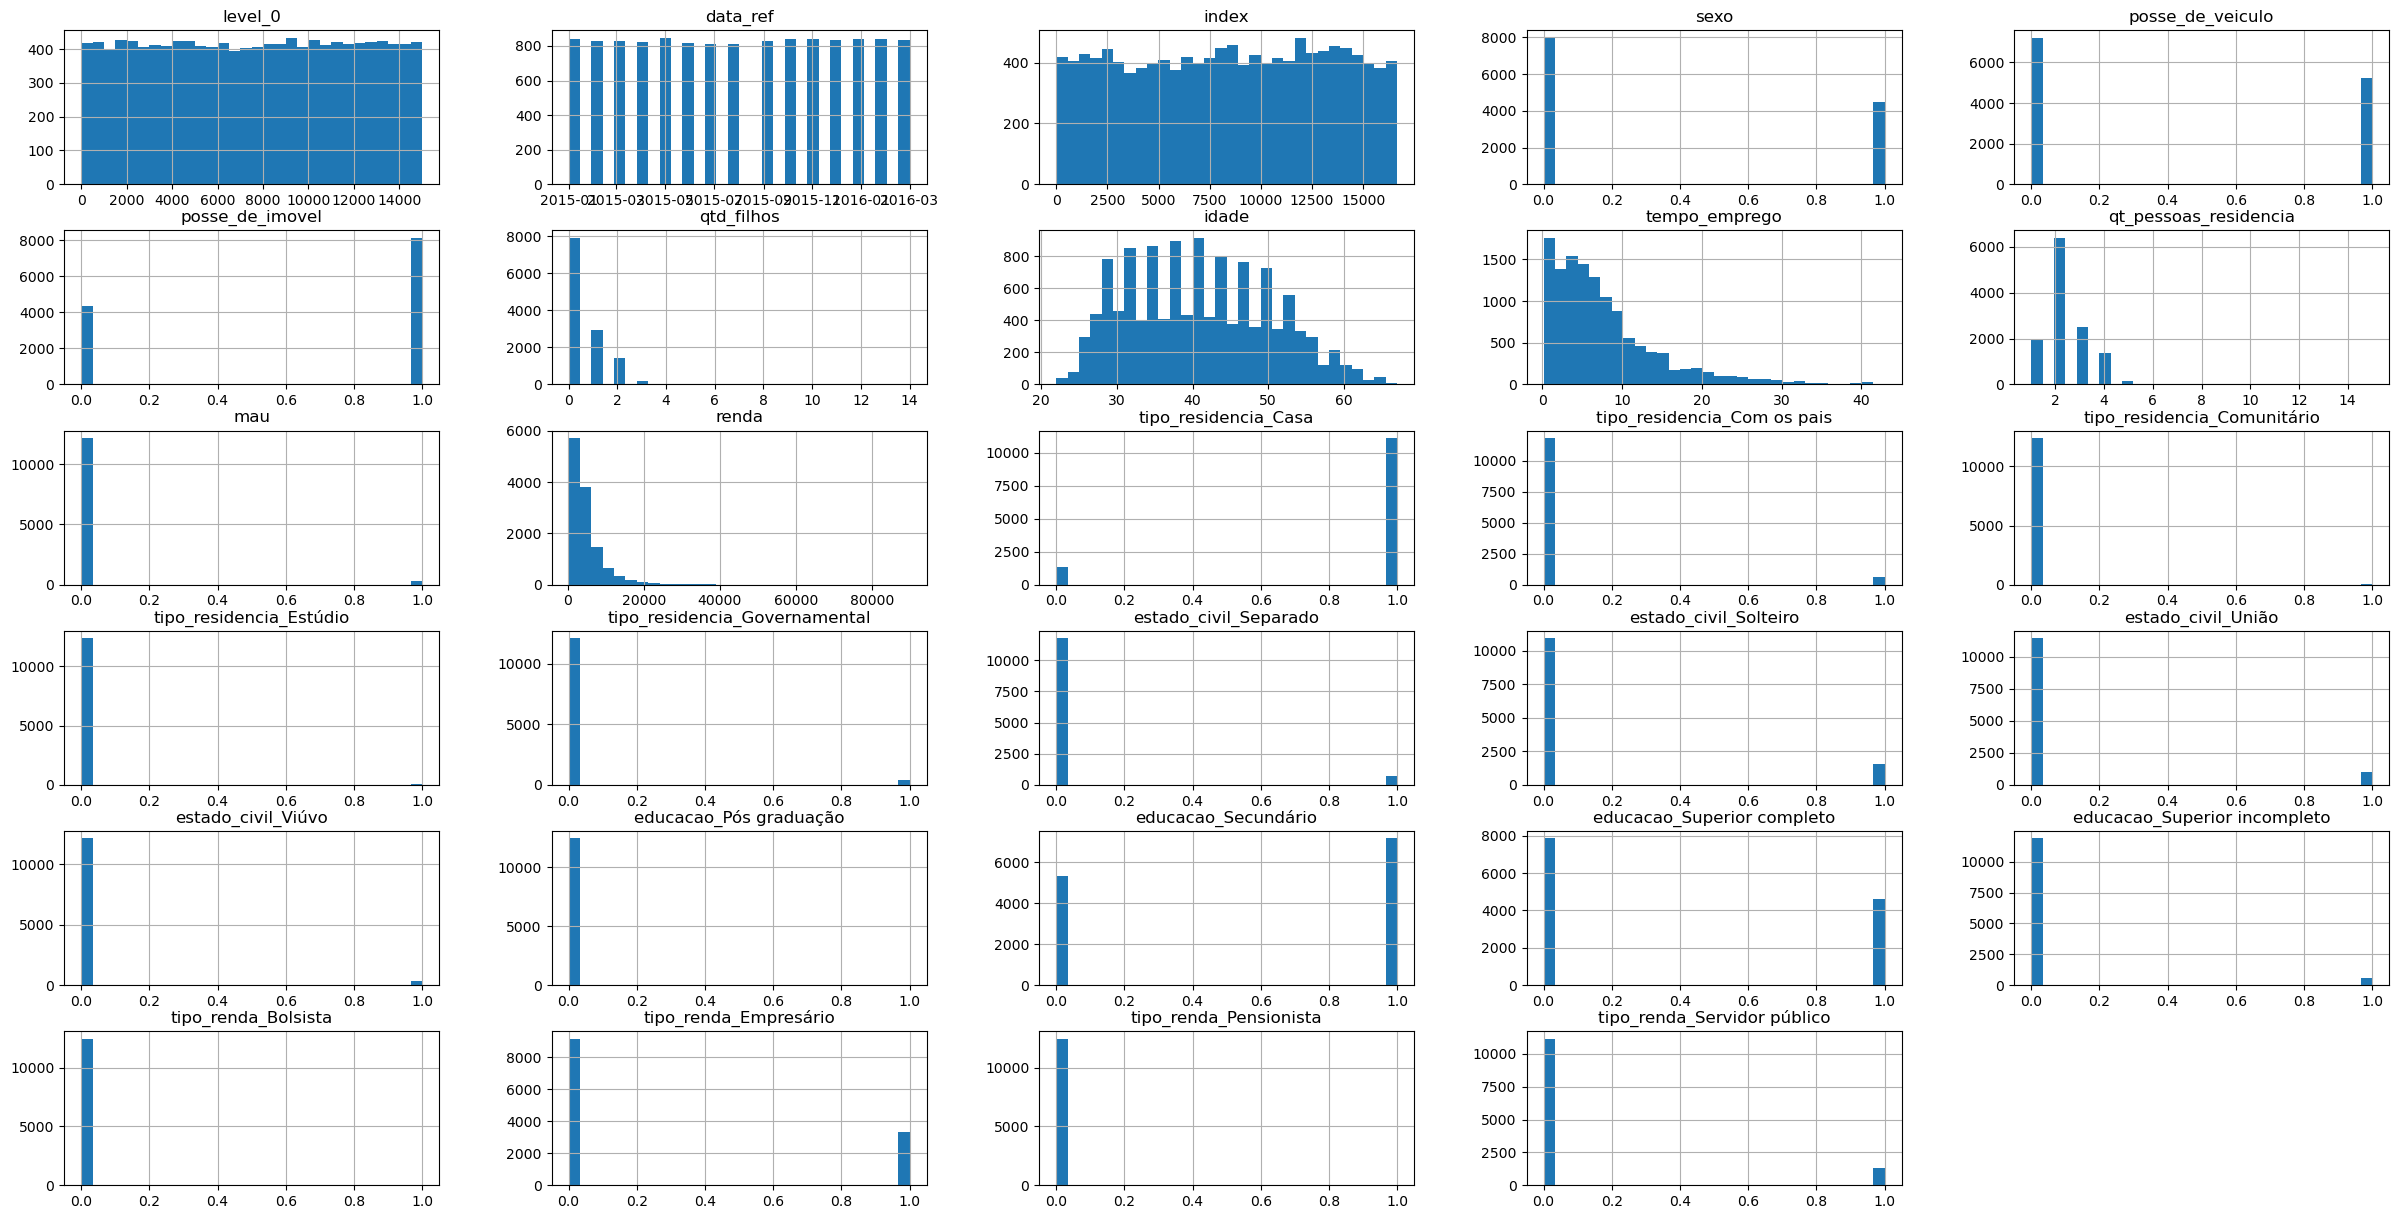

In [113]:
#Entendermos rapidamente a distribuição para pensar em possíveis regressões
df.hist(bins=30,figsize=(30,15));

---

---

---

In [114]:
regressao = sm.OLS(df['renda'],df['tempo_emprego']).fit()
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.511
Model:                            OLS   Adj. R-squared (uncentered):              0.511
Method:                 Least Squares   F-statistic:                          1.303e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                        0.00
Time:                        22:41:30   Log-Likelihood:                     -1.2337e+05
No. Observations:               12466   AIC:                                  2.467e+05
Df Residuals:                   12465   BIC:                                  2.468e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
tempo_emprego   477.3326      4.181    114.159      0.000     469.137     485.529
==============================================================================
Omnibus:                     7442.625   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177789.709
Skew:                           2.426   Prob(JB):                         0.00
Kurtosis:                      20.854   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

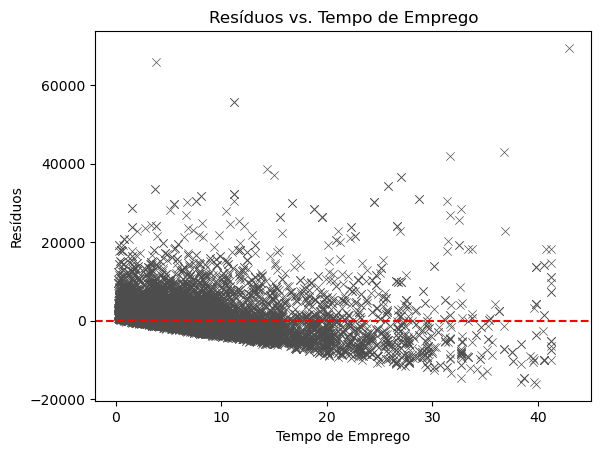

In [115]:
# Plotar os resíduos em função de tempo_emprego
sns.scatterplot(x=df['tempo_emprego'],y=regressao.resid,data=df,marker="x", color=".3")
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Tempo de Emprego')
plt.show()


Notamos que os resíduos não se distribuem de forma aleatória, ele tem uma característica descendente. Indica que o modelo não está capturando bem a relação entre as variáveis.


<AxesSubplot:>

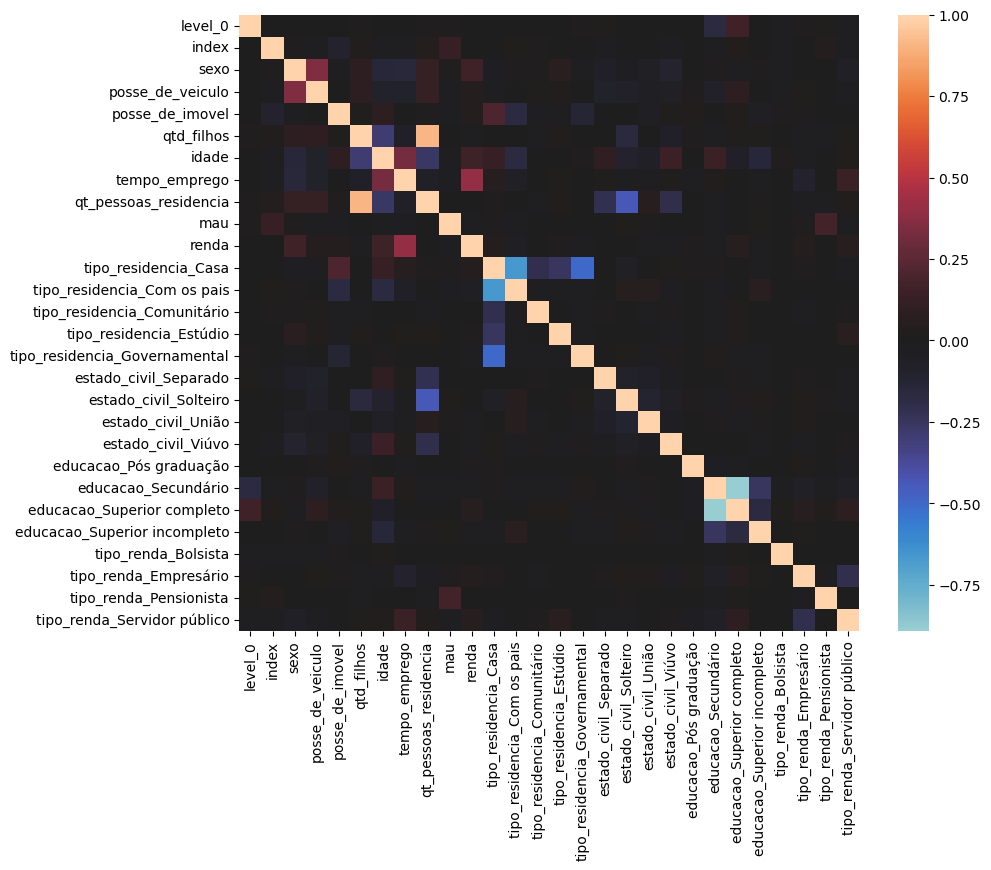

In [116]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),center=0)

In [117]:
X = df.drop(columns=['data_ref','renda'],axis=1)
y = df[['renda']]

In [118]:
modelo_inicial = sm.OLS(y,X).fit()
modelo_inicial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                              716.4
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                        0.00
Time:                        22:41:32   Log-Likelihood:                     -1.2199e+05
No. Observations:               12466   AIC:                                  2.440e+05
Df Residuals:                   12439   BIC:                                  2.442e+05
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
level_0                          -0.0060      0.009     -0.661      0.509      -0.024       0.012
index                             0.0067      0.008      0.821      0.412      -0.009       0.023
sexo                           2365.2359     88.009     26.875      0.000    2192.725    2537.747
posse_de_veiculo                -78.3695     84.767     -0.925      0.355    -244.525      87.786
posse_de_imovel                 355.3185     83.778      4.241      0.000     191.100     519.537
qtd_filhos                     -121.0880    284.471     -0.426      0.670    -678.695     436.519
idade                            29.8386      4.794      6.224      0.000      20.441      39.236
tempo_emprego                   299.4525      6.148     48.705      0.000     287.401     311.504
qt_pessoas_residencia           185.6893    274.276      0.677      0.498    -351.934     723.313
mau                             -42.0401    257.704     -0.163      0.870    -547.179     463.099
tipo_residencia_Casa           -381.3377    323.174     -1.180      0.238   -1014.810     252.134
tipo_residencia_Com os pais    -667.8481    363.016     -1.840      0.066   -1379.415      43.719
tipo_residencia_Comunitário    -612.1798    630.701     -0.971      0.332   -1848.451     624.092
tipo_residencia_Estúdio        -996.4660    544.290     -1.831      0.067   -2063.359      70.427
tipo_residencia_Governamental  -904.9104    392.194     -2.307      0.021   -1673.672    -136.149
estado_civil_Separado            25.7035    321.957      0.080      0.936    -605.381     656.788
estado_civil_Solteiro           255.3229    288.292      0.886      0.376    -309.775     820.421
estado_civil_União              -40.3515    143.632     -0.281      0.779    -321.892     241.189
estado_civil_Viúvo             -158.0946    371.937     -0.425      0.671    -887.148     570.959
educacao_Pós graduação         2186.1102   1075.395      2.033      0.042      78.169    4294.051
educacao_Secundário            -263.4107    423.206     -0.622      0.534   -1092.959     566.138
educacao_Superior completo      323.7650    425.448      0.761      0.447    -510.180    1157.710
educacao_Superior incompleto   -312.6804    456.765     -0.685      0.494   -1208.011     582.650
tipo_renda_Bolsista            -791.9530   2156.693     -0.367      0.713   -5019.405    3435.499
tipo_renda_Empresário          1022.6123     90.122     11.347      0.000     845.960    1199.265
tipo_renda_Pensionista         1728.1428   1459.351      1.184      0.236   -1132.411    4588.697
tipo_renda_Servidor público     435.4283    130.613      3.334      0.001     179.406     691.450
============================================

###  Pudemos observar diversos valores incosistentes e irrelevantes estatísticamente. Irei remover não só as explicativas com Tvalue acima de 5% como vou remover a categoria em si. Não parece ser viável ensinar um modelo apenas com um tipo de educação, um tipo de residência.. ele ficará extremamente específico, e não buscamos isso nesse modelo

In [119]:
X2 = X[['sexo','idade','tempo_emprego']]
modelo2 = sm.OLS(np.log(y),X2).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          8.810e+04
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                        0.00
Time:                        22:41:32   Log-Likelihood:                         -24585.
No. Observations:               12466   AIC:                                  4.918e+04
Df Residuals:                   12463   BIC:                                  4.920e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sexo              1.4525      0.032     46.017      0.000       1.391       1.514
idade             0.1715      0.001    254.855      0.000       0.170       0.173
tempo_emprego     0.0405      0.002     16.592      0.000       0.036       0.045
==============================================================================
Omnibus:                      232.780   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.154
Skew:                          -0.153   Prob(JB):                     1.23e-34
Kurtosis:                       2.545   Cond. No.                         86.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### observamos que ao passar a renda para sua escala logarítmica, tivemos um aumento expressivo no r2.

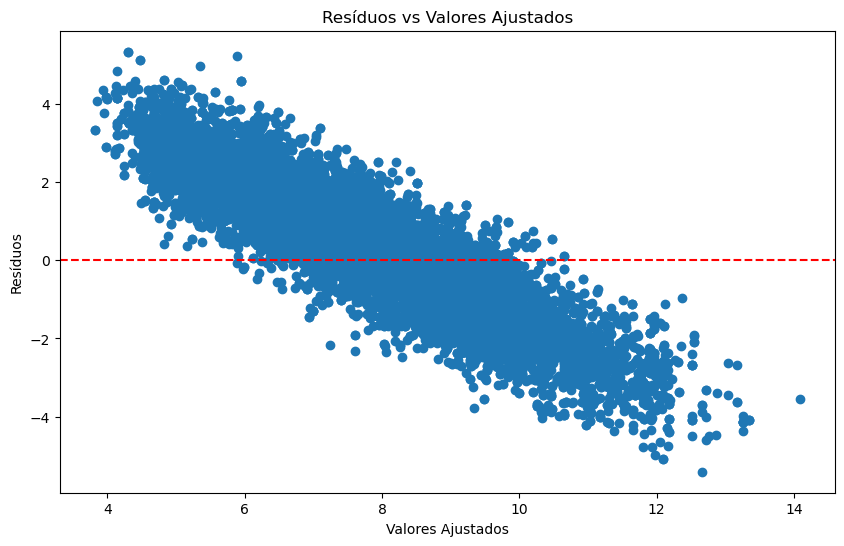

In [120]:
residuos = modelo2.resid

plt.figure(figsize=(10, 6))
plt.scatter(modelo2.fittedvalues, residuos)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

Padrão Curvado: Os resíduos parecem formar um padrão curvado, o que sugere que a relação entre a variável resposta (log da renda) e as variáveis preditoras não é linear. Isso é um indicativo de que talvez uma transformação das variáveis ou a adição de termos polinomiais seja necessária.

C:\Users\User\AppData\Local\Temp\ipykernel_10800\2350984427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['idade_squared'] = X2['idade'] ** 2
C:\Users\User\AppData\Local\Temp\ipykernel_10800\2350984427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['tempo_emprego_squared'] = X2['tempo_emprego'] ** 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.449e+05
Date:                Wed, 10 Jul 2024   Prob (F-statistic):                        0.00
Time:                        22:41:32   Log-Likelihood:                         -15252.
No. Observations:               12466   AIC:                                  3.051e+04
Df Residuals:                   12461   BIC:                                  3.055e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sexo                      0.5726      0.016     36.884      0.000       0.542       0.603
idade                     0.3671      0.001    321.038      0.000       0.365       0.369
tempo_emprego             0.0293      0.003     10.074      0.000       0.024       0.035
idade_squared            -0.0042   2.15e-05   -194.869      0.000      -0.004      -0.004
tempo_emprego_squared     0.0006   9.98e-05      6.269      0.000       0.000       0.001
==============================================================================
Omnibus:                       44.067   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.450
Skew:                           0.144   Prob(JB):                     2.23e-10
Kurtosis:                       3.055   Cond. No.                     4.05e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

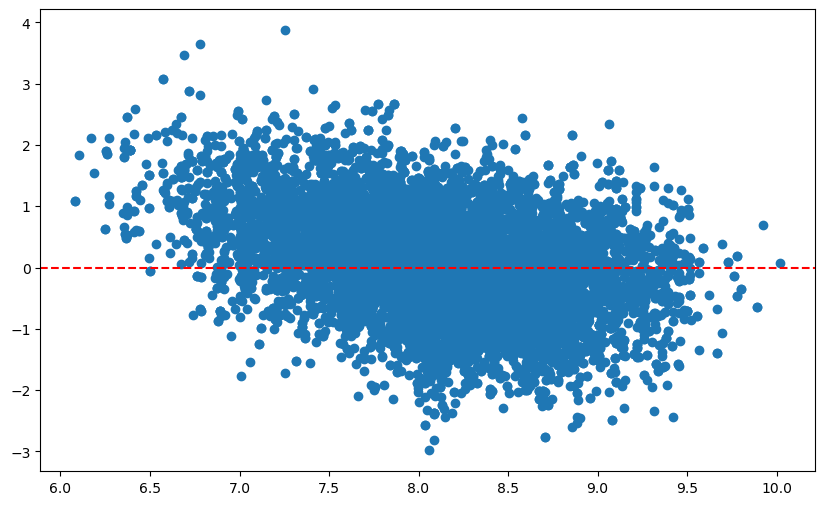

In [121]:
X2['idade_squared'] = X2['idade'] ** 2
X2['tempo_emprego_squared'] = X2['tempo_emprego'] ** 2

modelo_polinomial = sm.OLS(np.log(y), X2).fit()
display(modelo_polinomial.summary())
residuos_polinomial = modelo_polinomial.resid

plt.figure(figsize=(10, 6))
plt.scatter(modelo_polinomial.fittedvalues, residuos_polinomial)
plt.axhline(0, color='r', linestyle='--')
plt.show()


Pacerece melhor.